## Capstone project - Toxic Comments EDAV and Classification
#### --- The 2nd winter [Collaboratory](http://collaboratory.columbia.edu/) **Data Science Bootcamp** for Columbia University PhD students and postdoctoral scholars. 

Google (or *Alphabet*)'s [Jigsaw](https://jigsaw.google.com/) is a unit that aims to use technology to make people's life safer. One area they are working on is *online safety* and to reduce toxicity from online conversations. In Feburary 2017, they released *Conversation AI*, a tool that rates toxicity of online comments, which [didn't work well](https://www.technologyreview.com/s/603735/its-easy-to-slip-toxic-language-past-alphabets-toxic-comment-detector/). As part of their efforts to improve this tool, Jigsaw posted a set of [human-labelled comments](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge) on Kaggle.

In this capstone project, you can pursue one of the following directions. 
+ Follow a kaggle kernel on [Exploratory Data Analysis](https://www.kaggle.com/jagangupta/stop-the-s-toxic-comments-eda) and explore a bit futher. 
+ Try to run one of the [models used by *Conversation AI*](https://github.com/conversationai/unintended-ml-bias-analysis).
+ Follow a kaggle kernel on [predictive modeling](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/kernels) and replicate its results. 

The learning goal of this capstone project is to learn how to reproduce another analysis and introu

In [1]:
# Import modules
# Basic
import pandas as pd

# Text processing
import nltk, re
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Plot
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [2]:
# Load training data
train = pd.read_csv('../data/train.csv')
test  = pd.read_csv('../data/test.csv')

In [3]:
# What does the data look like?
train.head(3)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,22256635,"Nonsense? kiss off, geek. what I said is true...",1,0,0,0,0,0
1,27450690,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0
2,54037174,"""\n\n """"Points of interest"""" \n\nI removed the...",0,0,0,0,0,0


In [4]:
# nltk.download('punkt')

In [5]:
# import re
# rx = re.compile(u'[\W_]+',re.UNICODE)
# temp = train.comment_text[24].decode('utf-8')
# #rx.sub(u'', temp)
# #train.comment_text[24].encode('utf-8')
# tokenize_and_filter(temp)

In [6]:
# '►TALK'.decode('utf-8')

In [7]:
# for i in range(train.shape[0]):
#     train.comment_text[i] = rx.sub(u'',train.comment_text[i].encode'utf-8')

In [8]:
# Process the text
stemmer = PorterStemmer()

def tokenize_and_filter(text):
    # lower
    lowers = text.lower()
    # tokenize
    tokens = [word for sent in nltk.sent_tokenize(lowers) for word in nltk.word_tokenize(sent)]
    # filter out the stopwords
    # tokens = list(filter(lambda word: word not in stopwords.words('english'), tokens))
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(re.sub(r'[^\w\s]','',token))
    cleanText = ' '.join(t for t in filtered_tokens)
    
    return cleanText

cleanTextSeries = []


for row in range(train.shape[0]):
#     try:
        cleanTextSeries.append(tokenize_and_filter(train.comment_text[row].decode('utf-8')))
#     except UnicodeDecodeError:
#         print row
        

#tokenize_and_filter("How are you?")
#cleanTextSeries

In [9]:
# Append processed comments to original dataframe as a new column
train['comment_processed'] = cleanTextSeries 


In [10]:
print train.comment_text[24]
print train.comment_text[27]

@AnnieHall, what separates this from capitalism is state terrorism conducted against its own citizens and others under its jurisdiction, whether legitimate or not, as a matter of policy. And for capitalism we have the Holocaust et al. for Nazi Germany, etc., so you cannot say that Communism is being POV singled out. To NOT have this article would be POV.  ►TALK
"====Regarding edits made during December 2 2006 (UTC)====
Thank you for experimenting with  Wikipedia. Your test worked, and it has been reverted or removed. Please use the sandbox for any other tests you may want to do. Take a look at the welcome page to learn more about contributing to our encyclopedia. Ω612 '''ER "


In [11]:
# For each type of comment, store the corresponding dataframe into a hashtable (dictionary in Python)
type_names = list(train.columns.values)[2:8]
type_names.append('not_toxic')
print(type_names)

df_dict = dict()
for col_idx, name in enumerate(type_names):
    if name != 'not_toxic':
        df_dict[name] = train[train.iloc[:,col_idx+2]==1]
    else:
        df_dict['not_toxic'] = train[(train.toxic==0) & (train.severe_toxic==0) & (train.obscene==0) &(train.threat == 0) &(train.identity_hate == 0) &(train.insult == 0)]

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'not_toxic']


In [12]:
# This is how not_toxic comments look like
df_dict['not_toxic'].head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_processed
1,27450690,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0,please do not vandalize pages as you did with ...
2,54037174,"""\n\n """"Points of interest"""" \n\nI removed the...",0,0,0,0,0,0,points of interest i removed the points of int...
3,77493077,Asking some his nationality is a Racial offenc...,0,0,0,0,0,0,asking some his nationality is a racial offenc...
4,79357270,The reader here is not going by my say so for ...,0,0,0,0,0,0,the reader here is not going by my say so for ...
5,82428052,Fried chickens \n\nIs dat sum fried chickens?,0,0,0,0,0,0,fried chickens is dat sum fried chickens


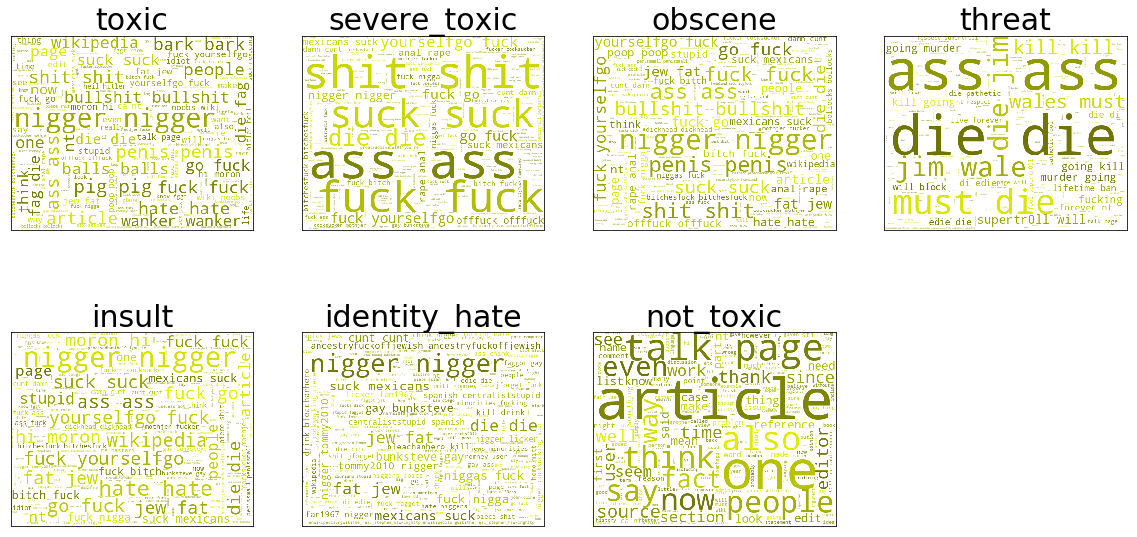

In [13]:
# Visualize each type of comments in wordcloud
def random_color_func(word=None, font_size=None, 
                      position=None, orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 45.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
    
    return "hsl({}, {}%, {}%)".format(h, s, l)

wc = WordCloud(background_color='white',
               color_func=random_color_func,
               width=500, height=400)

%matplotlib inline

plt.rcParams["figure.figsize"] = (20,10)
f, ax = plt.subplots(2, 4)

for i in range(2):
    for j in range(4):
        if i*4+j < 7:
            wc.generate(" ".join(df_dict[type_names[i*4+j]].comment_processed))
            ax[i,j].imshow(wc)
            ax[i,j].set_xticks([])
            ax[i,j].set_yticks([])
            ax[i,j].set_title(type_names[i*4+j],fontdict={'fontsize':30})
        else:
            ax[i,j].set_visible(False)

The following few cells are taken from https://www.kaggle.com/jagangupta/stop-the-s-toxic-comments-eda, and they find various quantities like word counts, link mentions, IP addresses when available, etc.

In [14]:
merge=pd.concat([train.iloc[:,0:2],test.iloc[:,0:2]])
df=merge.reset_index(drop=True)

In [17]:
import numpy as np

In [18]:
df['count_sent']=df["comment_text"].apply(lambda x: len(re.findall("\n",str(x)))+1)
#Word count in each comment:
df['count_word']=df["comment_text"].apply(lambda x: len(str(x).split()))
#Unique word count
df['count_unique_word']=df["comment_text"].apply(lambda x: len(set(str(x).split())))
#Letter count
df['count_letters']=df["comment_text"].apply(lambda x: len(str(x)))
#punctuation count
#df["count_punctuations"] =df["comment_text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
#upper case words count
df["count_words_upper"] = df["comment_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
#title case words count
df["count_words_title"] = df["comment_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
#Number of stopwords
df["mean_word_len"] = df["comment_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [19]:
#Leaky features
df['ip']=df["comment_text"].apply(lambda x: re.findall("\d{1,3}.\d{1,3}.\d{1,3}.\d{1,3}",str(x)))
#count of ip addresses
df['count_ip']=df["ip"].apply(lambda x: len(x))

#links
df['link']=df["comment_text"].apply(lambda x: re.findall("http://.*com",str(x)))
#count of links
df['count_links']=df["link"].apply(lambda x: len(x))

#article ids
df['article_id']=df["comment_text"].apply(lambda x: re.findall("\d:\d\d\s{0,5}$",str(x)))
df['article_id_flag']=df.article_id.apply(lambda x: len(x))

#username
##              regex for     Match anything with [[User: ---------- ]]
# regexp = re.compile("\[\[User:(.*)\|")
df['username']=df["comment_text"].apply(lambda x: re.findall("\[\[User(.*)\|",str(x)))
#count of username mentions
df['count_usernames']=df["username"].apply(lambda x: len(x))
#check if features are created
#df.username[df.count_usernames>0]

In [20]:
leaky_feats=df[["ip","link","article_id","username","count_ip","count_links","count_usernames","article_id_flag"]]
leaky_feats_train=leaky_feats.iloc[:train.shape[0]]
leaky_feats_test=leaky_feats.iloc[train.shape[0]:]

In [21]:
#filterout the entries without ips
train_ips=leaky_feats_train.ip[leaky_feats_train.count_ip!=0]
test_ips=leaky_feats_test.ip[leaky_feats_test.count_ip!=0]
#get the unique list of ips in test and train datasets
train_ip_list=list(set([a for b in train_ips.tolist() for a in b]))
test_ip_list=list(set([a for b in test_ips.tolist() for a in b]))

The next section uses the tools from http://blog.brush.co.nz/2009/07/geoip/, including geoip.py and GeoIP.dat (download them there).  It would be nice and probably simple to implement this: https://github.com/pieqq/PyGeoIpMap.  We count the number of IP addresses obtained from each country.  The plot needs to be improved and made clear.

In [36]:
country_list = []
import geoip
for i in range(len(train_ip_list)):
    country_list.append(geoip.country(train_ip_list[i]))
    
country_count_list = []    
for i in set(country_list):
    country_count_list.append(country_list.count(i))

# Reduce country list to a set of no duplicates
country_list = set(country_list)   

# Remove the blank spaces from each list
country_list.remove('')
country_count_list.remove(3625)

TypeError: 'builtin_function_or_method' object has no attribute '__getitem__'

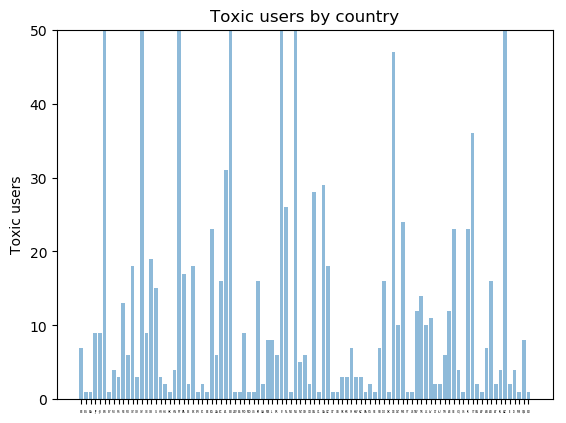

In [46]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
countries = country_list
y_pos = np.arange(len(countries))
counts = country_count_list
#performance = [10,8,6,4,2,1]
 
plt.bar(countries, counts, align='center', alpha=0.5)
plt.xticks(y_pos, countries, fontsize=2)
plt.ylabel('Toxic users')
plt.title('Toxic users by country')
plt.ylim(0,50)
 
plt.show()



(Rainer Corley and Yang Liu)